In [56]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=24)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv('/home/akmal/Desktop/LoanRepayAnalysis.csv')
data = data.dropna()
print(data.shape)
print(list(data.columns))

(22490, 14)
['id', 'purpose', 'tenure', 'credit_score', 'default_count', 'delay_count', 'Avg SALARY', 'repayment_status', 'status', 'city', 'stay_type', 'AGE', 'gender', 'disbursement_completion_date']


In [3]:
data.head()

,id,purpose,tenure,credit_score,default_count,delay_count,Avg SALARY,repayment_status,status,city,stay_type,AGE,gender,disbursement_completion_date
0,16919,DEBT CONSOLIDATION,2,803.0,0.0,0,32546.0,COMPLETED,CLOSED,Mumbai,SELF OWNED,26.0,MALE,2018-06-06
1,17000,ADVANCE SALARY,2,804.0,0.0,0,24975.0,COMPLETED,CLOSED,Bangalore,RENTED,28.0,MALE,2018-06-06
2,17148,HOME APPLICANCE PURCHASE,3,660.0,0.0,0,25000.0,COMPLETED,CLOSED,Bangalore,RENTED,23.0,MALE,2018-06-08
3,17191,ADVANCE SALARY,3,751.0,0.0,23,20515.0,COMPLETED,CLOSED,Bangalore Rural,RENTED,32.0,MALE,2018-06-08
4,17314,EDUCATION,3,660.0,0.0,0,24400.0,WRITTEN OFF,DISBURSED,Thane,RENTED,34.0,MALE,2018-06-11


# Predict variable (desired target)

# y — has the borrower repayment completed? (binary: “1”, means “Yes”, “0” means “No”)

In [4]:
data

,id,purpose,tenure,credit_score,default_count,delay_count,Avg SALARY,repayment_status,status,city,stay_type,AGE,gender,disbursement_completion_date
0,16919,DEBT CONSOLIDATION,2,803.0,0.0,0,32546.0,COMPLETED,CLOSED,Mumbai,SELF OWNED,26.0,MALE,2018-06-06
1,17000,ADVANCE SALARY,2,804.0,0.0,0,24975.0,COMPLETED,CLOSED,Bangalore,RENTED,28.0,MALE,2018-06-06
2,17148,HOME APPLICANCE PURCHASE,3,660.0,0.0,0,25000.0,COMPLETED,CLOSED,Bangalore,RENTED,23.0,MALE,2018-06-08
3,17191,ADVANCE SALARY,3,751.0,0.0,23,20515.0,COMPLETED,CLOSED,Bangalore Rural,RENTED,32.0,MALE,2018-06-08
4,17314,EDUCATION,3,660.0,0.0,0,24400.0,WRITTEN OFF,DISBURSED,Thane,RENTED,34.0,MALE,2018-06-11
5,17316,ADVANCE SALARY,3,655.0,0.0,11,28000.0,COMPLETED,CLOSED,Mumbai,FAMILY OWNED,21.0,MALE,2018-06-11
6,17436,MEDICAL EMERGENCY,3,795.0,0.0,3,19500.0,COMPLETED,CLOSED,Bangalore,RENTED,34.0,MALE,2018-06-11
7,17602,EDUCATION,3,691.0,0.0,7,35000.0,COMPLETED,CLOSED,Pune,RENTED,34.0,MALE,2018-06-12
8,17115,MEDICAL EMERGENCY,2,0.0,0.0,0,20000.0,COMPLETED,CLOSED,Bangalore,PG,26.0,MALE,2018-06-13
9,17274,EDUCATION,3,871.0,0.0,0,20000.0,COMPLETED,CLOSED,Bangalore,RENTED,39.0,MALE,2018-06-13


In [5]:
data.head()

,id,purpose,tenure,credit_score,default_count,delay_count,Avg SALARY,repayment_status,status,city,stay_type,AGE,gender,disbursement_completion_date
0,16919,DEBT CONSOLIDATION,2,803.0,0.0,0,32546.0,COMPLETED,CLOSED,Mumbai,SELF OWNED,26.0,MALE,2018-06-06
1,17000,ADVANCE SALARY,2,804.0,0.0,0,24975.0,COMPLETED,CLOSED,Bangalore,RENTED,28.0,MALE,2018-06-06
2,17148,HOME APPLICANCE PURCHASE,3,660.0,0.0,0,25000.0,COMPLETED,CLOSED,Bangalore,RENTED,23.0,MALE,2018-06-08
3,17191,ADVANCE SALARY,3,751.0,0.0,23,20515.0,COMPLETED,CLOSED,Bangalore Rural,RENTED,32.0,MALE,2018-06-08
4,17314,EDUCATION,3,660.0,0.0,0,24400.0,WRITTEN OFF,DISBURSED,Thane,RENTED,34.0,MALE,2018-06-11


In [ ]:
#df['elderly'] = np.where(df['age']>=50, 'yes', 'no')

In [9]:
import pandas as pd
import sqlite3

#read the CSV
df = pd.read_csv('/home/akmal/Desktop/LoanRepayAnalysis.csv')
#connect to a database
conn = sqlite3.connect("Any_Database_Name.db") #if the db does not exist, this creates a Any_Database_Name.db file in the current directory
#store your table in the database:
df.to_sql('Some_Table_Name', conn)
#read a SQL Query out of your database and into a pandas dataframe
sql_string = 'SELECT * FROM Some_Table_Name'
df = pd.read_sql(sql_string, conn)

In [8]:
#conn.execute("DROP TABLE Some_Table_Name")

In [11]:
df.head()

,index,id,purpose,tenure,credit_score,default_count,delay_count,Avg SALARY,repayment_status,status,city,stay_type,AGE,gender,disbursement_completion_date
0,0,16919,DEBT CONSOLIDATION,2,803.0,0.0,0,32546.0,COMPLETED,CLOSED,Mumbai,SELF OWNED,26.0,MALE,2018-06-06
1,1,17000,ADVANCE SALARY,2,804.0,0.0,0,24975.0,COMPLETED,CLOSED,Bangalore,RENTED,28.0,MALE,2018-06-06
2,2,17148,HOME APPLICANCE PURCHASE,3,660.0,0.0,0,25000.0,COMPLETED,CLOSED,Bangalore,RENTED,23.0,MALE,2018-06-08
3,3,17191,ADVANCE SALARY,3,751.0,0.0,23,20515.0,COMPLETED,CLOSED,Bangalore Rural,RENTED,32.0,MALE,2018-06-08
4,4,17314,EDUCATION,3,660.0,0.0,0,24400.0,WRITTEN OFF,DISBURSED,Thane,RENTED,34.0,MALE,2018-06-11


In [12]:
df

,index,id,purpose,tenure,credit_score,default_count,delay_count,Avg SALARY,repayment_status,status,city,stay_type,AGE,gender,disbursement_completion_date
0,0,16919,DEBT CONSOLIDATION,2,803.0,0.0,0,32546.0,COMPLETED,CLOSED,Mumbai,SELF OWNED,26.0,MALE,2018-06-06
1,1,17000,ADVANCE SALARY,2,804.0,0.0,0,24975.0,COMPLETED,CLOSED,Bangalore,RENTED,28.0,MALE,2018-06-06
2,2,17148,HOME APPLICANCE PURCHASE,3,660.0,0.0,0,25000.0,COMPLETED,CLOSED,Bangalore,RENTED,23.0,MALE,2018-06-08
3,3,17191,ADVANCE SALARY,3,751.0,0.0,23,20515.0,COMPLETED,CLOSED,Bangalore Rural,RENTED,32.0,MALE,2018-06-08
4,4,17314,EDUCATION,3,660.0,0.0,0,24400.0,WRITTEN OFF,DISBURSED,Thane,RENTED,34.0,MALE,2018-06-11
5,5,17316,ADVANCE SALARY,3,655.0,0.0,11,28000.0,COMPLETED,CLOSED,Mumbai,FAMILY OWNED,21.0,MALE,2018-06-11
6,6,17436,MEDICAL EMERGENCY,3,795.0,0.0,3,19500.0,COMPLETED,CLOSED,Bangalore,RENTED,34.0,MALE,2018-06-11
7,7,17602,EDUCATION,3,691.0,0.0,7,35000.0,COMPLETED,CLOSED,Pune,RENTED,34.0,MALE,2018-06-12
8,8,17115,MEDICAL EMERGENCY,2,0.0,0.0,0,20000.0,COMPLETED,CLOSED,Bangalore,PG,26.0,MALE,2018-06-13
9,9,17274,EDUCATION,3,871.0,0.0,0,20000.0,COMPLETED,CLOSED,Bangalore,RENTED,39.0,MALE,2018-06-13


In [13]:
loan_status = pd.read_sql("""SELECT purpose, tenure, credit_score, default_count, "Avg SALARY", city, stay_type,
                                AGE, gender,
                        CASE WHEN repayment_status IN ('COMPLETED', 'PREPAID','REGULAR') THEN 1 ELSE 0
                        END AS "Loan_Status"
                        FROM Some_Table_Name3
                       ;""", conn)

# Adding new column named Loan_status Where if repayment status was COMPLETED, PREPAID, OR REGULAR then value is 1 else value is 0

In [86]:
loan_status

,purpose,tenure,credit_score,default_count,Avg SALARY,city,stay_type,AGE,gender,Loan_Status
0,DEBT CONSOLIDATION,2,803.0,0.0,32546.0,Mumbai,SELF OWNED,26.0,MALE,1
1,ADVANCE SALARY,2,804.0,0.0,24975.0,Bangalore,RENTED,28.0,MALE,1
2,HOME APPLICANCE PURCHASE,3,660.0,0.0,25000.0,Bangalore,RENTED,23.0,MALE,1
3,ADVANCE SALARY,3,751.0,0.0,20515.0,Bangalore Rural,RENTED,32.0,MALE,1
4,EDUCATION,3,660.0,0.0,24400.0,Thane,RENTED,34.0,MALE,0
5,ADVANCE SALARY,3,655.0,0.0,28000.0,Mumbai,FAMILY OWNED,21.0,MALE,1
6,MEDICAL EMERGENCY,3,795.0,0.0,19500.0,Bangalore,RENTED,34.0,MALE,1
7,EDUCATION,3,691.0,0.0,35000.0,Pune,RENTED,34.0,MALE,1
8,MEDICAL EMERGENCY,2,0.0,0.0,20000.0,Bangalore,PG,26.0,MALE,1
9,EDUCATION,3,871.0,0.0,20000.0,Bangalore,RENTED,39.0,MALE,1


In [87]:
df['purpose'].unique() #Types of Loan purpose

KeyError: 'purpose'

### To Check how many loans are success and how many are in default category i.e Delayed1, Delayed2, Delayed3, Default, Written off, Non-performing asset

In [16]:
loan_status['Loan_Status'].value_counts()

1    19468
0     3119
Name: Loan_Status, dtype: int64

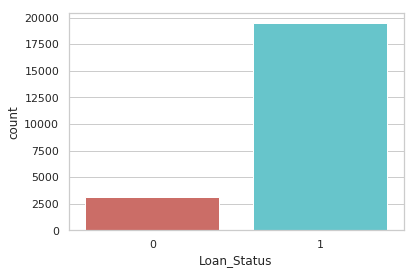

<Figure size 432x288 with 0 Axes>

In [17]:
# Plotting graph
sns.countplot(x='Loan_Status', data = loan_status, palette='hls')
plt.show()
plt.savefig('count_plot')

### Checking ratio of (Successful Repayments & Defaulters) in percentage

In [18]:
count_default = len(data[loan_status['Loan_Status']==0])
print(count_default)
count_succ_repay = len(data[loan_status['Loan_Status']==1])
print(count_succ_repay)
pct_of_default = count_default/(count_default+count_succ_repay)
pct = count_default / count_succ_repay * 100
print(pct)
print("Percentage of default repayment is", pct_of_default*100)




3037
19453
0
('Percentage of default repayment is', 0)


/home/akmal/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/akmal/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#To get all the mean , median, max, min etc of each columns
loan_status.describe()

,tenure,credit_score,default_count,Avg SALARY,AGE,Loan_Status
count,22587.000000,22586.000000,22581.000000,22587.000000,22587.000000,22587.000000
mean,2.684376,722.663508,0.009920,30273.544887,30.764422,0.861912
std,0.668215,89.218422,0.241212,22956.426108,5.382967,0.345000
min,1.000000,-1.000000,0.000000,7532.000000,20.000000,0.000000
25%,3.000000,690.000000,0.000000,18000.000000,27.000000,1.000000
50%,3.000000,725.000000,0.000000,24151.500000,30.000000,1.000000
75%,3.000000,761.000000,0.000000,34797.000000,34.000000,1.000000
max,3.000000,894.000000,14.000000,660000.000000,53.000000,1.000000


### To check type of each columns

In [20]:
loan_status.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22587 entries, 0 to 22586
Data columns (total 10 columns):
purpose          22573 non-null object
tenure           22587 non-null int64
credit_score     22586 non-null float64
default_count    22581 non-null float64
Avg SALARY       22587 non-null float64
city             22587 non-null object
stay_type        22587 non-null object
AGE              22587 non-null float64
gender           22587 non-null object
Loan_Status      22587 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.7+ MB


In [21]:
#Changing Loan_status to float
loan_status.Loan_Status = loan_status.Loan_Status.astype(float)
#see the change
loan_status.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22587 entries, 0 to 22586
Data columns (total 10 columns):
purpose          22573 non-null object
tenure           22587 non-null int64
credit_score     22586 non-null float64
default_count    22581 non-null float64
Avg SALARY       22587 non-null float64
city             22587 non-null object
stay_type        22587 non-null object
AGE              22587 non-null float64
gender           22587 non-null object
Loan_Status      22587 non-null float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.7+ MB


### Calulating Percentage of Defaul and success repayment

In [22]:
count_default = len(data[loan_status['Loan_Status']==0])
print(count_default)
count_succ_repay = len(data[loan_status['Loan_Status']==1])
print(count_succ_repay)
pct_of_default = float(count_default)/(count_default+count_succ_repay)
print("Percentage of default repayment is", pct_of_default*100)
pct_of_succ_repay = float(count_succ_repay)/(count_default+count_succ_repay)
print("Percentage of Success repayment is", pct_of_succ_repay*100)
# pct = count_default / count_succ_repay * 100
# print(pct)




3037
19453
('Percentage of default repayment is', 13.503779457536682)
('Percentage of Success repayment is', 86.49622054246332)


/home/akmal/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/akmal/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
loan_status.groupby('Loan_Status').mean()

,tenure,credit_score,default_count,Avg SALARY,AGE
Loan_Status,,,,,
0.0,2.818852,709.410067,0.019878,24714.181468,29.917922
1.0,2.662831,724.786973,0.008324,31164.219558,30.900041


In [24]:
loan_status.Loan_Status = loan_status.Loan_Status.astype(int)
#see the change
loan_status.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22587 entries, 0 to 22586
Data columns (total 10 columns):
purpose          22573 non-null object
tenure           22587 non-null int64
credit_score     22586 non-null float64
default_count    22581 non-null float64
Avg SALARY       22587 non-null float64
city             22587 non-null object
stay_type        22587 non-null object
AGE              22587 non-null float64
gender           22587 non-null object
Loan_Status      22587 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 1.7+ MB


In [25]:
loan_status['Loan_Status'].head()

0    1
1    1
2    1
3    1
4    0
Name: Loan_Status, dtype: int64

In [26]:
loan_status.groupby('Loan_Status').mean()

,tenure,credit_score,default_count,Avg SALARY,AGE
Loan_Status,,,,,
0,2.818852,709.410067,0.019878,24714.181468,29.917922
1,2.662831,724.786973,0.008324,31164.219558,30.900041


### We can calculate categorical means for other categorical variables such as purpose and city to get a more detailed sense of our data

In [27]:
perpose_mean = loan_status.groupby('purpose').mean()

In [28]:
perpose_mean

,tenure,credit_score,default_count,Avg SALARY,AGE,Loan_Status
purpose,,,,,,
ADVANCE SALARY,2.617168,724.504425,0.008320,30626.928407,30.468850,0.872743
ADVANCED SALARY,1.500000,694.500000,0.000000,29434.750000,29.500000,1.000000
BUSINESS PURPOSE,2.753056,716.618582,0.007335,27648.784707,29.794621,0.826406
CAR PURCHASE,2.774194,734.032258,0.000000,28291.241935,30.774194,0.838710
DEBT CONSOLIDATION,2.713106,727.986584,0.012384,37315.207430,31.159959,0.894737
EDUCATION,2.696000,721.944000,0.008615,29668.000308,33.523077,0.872000
FAMILY FUNCTION LOAN,2.740741,721.807505,0.014620,29641.869152,31.336745,0.857212
HOME APPLIANCE PURCHASE,2.944444,711.055556,0.000000,31607.527778,30.611111,0.722222
HOME APPLICANCE PURCHASE,2.715649,716.645038,0.030622,30298.599470,30.479962,0.882634


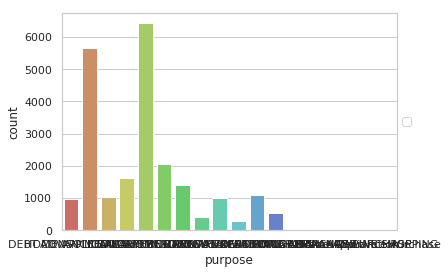

<Figure size 432x288 with 0 Axes>

In [29]:
# Plotting graph
sns.countplot(x='purpose', data = loan_status, palette='hls')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.rc("font", size=24)
plt.savefig('count_plot')

In [30]:
city_mean=loan_status.groupby('city').mean()
city_mean

,tenure,credit_score,default_count,Avg SALARY,AGE,Loan_Status
city,,,,,,
411014,3.000000,706.500000,0.000000,32300.500000,36.000000,1.000000
AHMEDABAD,1.000000,748.000000,0.000000,16500.000000,30.000000,1.000000
AMARAPURAM,3.000000,689.000000,0.000000,12344.000000,22.000000,1.000000
ANAND,2.000000,766.000000,0.000000,14564.000000,32.000000,1.000000
AURANGABAD,3.000000,708.000000,0.000000,14025.000000,33.000000,0.000000
Adilabad,2.923077,602.230769,0.000000,21797.923077,29.384615,0.692308
Agashi Chalpeth virar west,3.000000,694.000000,0.000000,28704.000000,25.000000,0.000000
Ahmadabad,3.000000,798.000000,0.000000,43289.500000,34.000000,1.000000
Ahmed Nagar,2.722222,687.611111,0.000000,17471.472222,28.333333,0.944444


In [31]:
loan_status.groupby('stay_type').mean()

,tenure,credit_score,default_count,Avg SALARY,AGE,Loan_Status
stay_type,,,,,,
FAMILY OWNED,2.702107,723.661758,0.012814,27833.975455,30.552682,0.864823
OFFICE PROVIDED,2.683284,734.501466,0.000000,28380.639296,29.618768,0.697947
OFFICE PROVIDED(Private),3.000000,720.000000,0.000000,28903.500000,35.000000,1.000000
OTHER,2.688525,732.618852,0.000000,26471.967213,29.516393,0.647541
PG,2.748571,703.097143,0.011429,25108.382857,26.977143,0.920000
RENTED,2.678050,723.621248,0.008540,30834.935019,30.672065,0.865341
SELF OWNED,2.642350,712.121270,0.008527,38078.603349,32.738513,0.878257


In [32]:
loan_status.groupby('gender').mean()

,tenure,credit_score,default_count,Avg SALARY,AGE,Loan_Status
gender,,,,,,
FEMALE,2.722982,721.094398,0.012351,28869.661447,29.826202,0.872078
MALE,2.679416,722.771790,0.009676,30434.945880,30.872033,0.860830
OTHER,2.912281,746.578947,0.000000,28732.061404,29.824561,0.842105


In [33]:
loan_status.groupby('credit_score').mean()

,tenure,default_count,Avg SALARY,AGE,Loan_Status
credit_score,,,,,
-1.0,2.866667,0.0,16840.433333,26.733333,0.733333
0.0,2.757143,0.0,21836.488095,27.938095,0.719048
1.0,3.000000,0.0,23500.000000,23.000000,0.000000
4.0,3.000000,0.0,15825.000000,25.000000,0.000000
74.0,2.000000,0.0,26180.500000,37.000000,1.000000
373.0,3.000000,0.0,46600.000000,39.000000,1.000000
538.0,3.000000,0.0,24000.000000,33.000000,0.000000
560.0,3.000000,0.0,38534.000000,34.000000,1.000000
564.0,3.000000,0.0,32500.000000,28.000000,1.000000


[Text(0,0,'0%'),
 Text(0,1000,'4%'),
 Text(0,2000,'9%'),
 Text(0,3000,'13%'),
 Text(0,4000,'18%'),
 Text(0,5000,'22%'),
 Text(0,6000,'27%')]

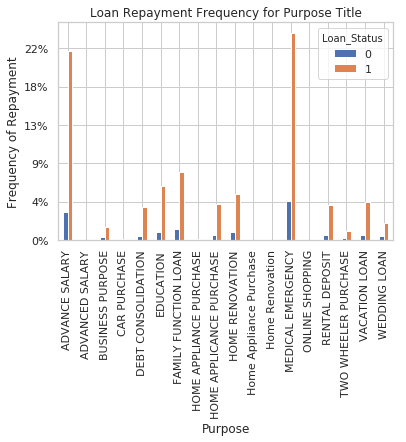

In [34]:
%matplotlib inline
pd.crosstab(loan_status.purpose,loan_status.Loan_Status).plot(kind='bar')
plt.title('Loan Repayment Frequency for Purpose Title')
plt.xlabel('Purpose')
plt.ylabel('Frequency of Repayment')
plt.savefig('repay_fre_purpose')
plt.gca().set_yticklabels(['{:.0f}%'.format((x/22490)*100) for x in plt.gca().get_yticks()]) 


In [35]:
# table=pd.crosstab(loan_status.stay_type,loan_status.Loan_Status)
# table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
#                                                 stacked=True)


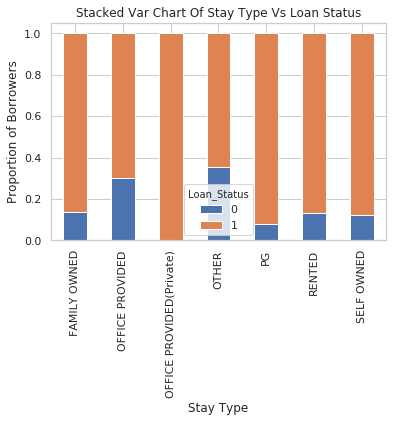

In [36]:
table=pd.crosstab(loan_status.stay_type,loan_status.Loan_Status)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
                                                stacked=True)
plt.title('Stacked Var Chart Of Stay Type Vs Loan Status')
plt.xlabel('Stay Type')
plt.ylabel('Proportion of Borrowers')
plt.savefig('stay_type_vs_repay_stack')

#### Stay Type seems little strong predictor for the outcome variable. But we will examine other variables too

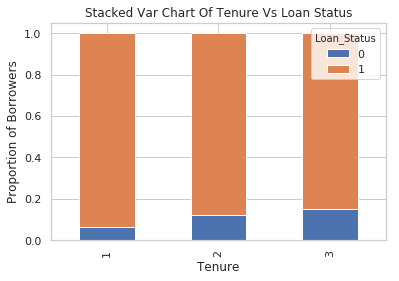

In [37]:
table=pd.crosstab(loan_status.tenure,loan_status.Loan_Status)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
                                                stacked=True)
plt.title('Stacked Var Chart Of Tenure Vs Loan Status')
plt.xlabel('Tenure')
plt.ylabel('Proportion of Borrowers')
plt.savefig('Tenure_vs_repay_stack')

### tenure can be the good predictor

Loan_Status       0      1
default_count             
0.0            3099  19395
1.0              10     37
2.0               5     13
3.0               0      8
4.0               0      1
5.0               1      2
6.0               1      1
8.0               1      0
9.0               1      2
11.0              0      1
13.0              0      2
14.0              1      0


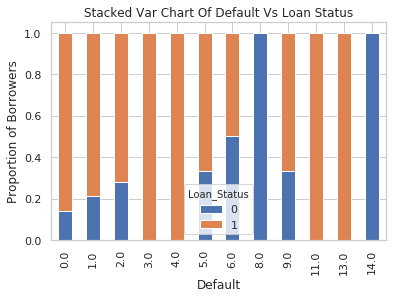

In [38]:
table=pd.crosstab(loan_status.default_count,loan_status.Loan_Status)
print(table)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',
                                                stacked=True)
plt.title('Stacked Var Chart Of Default Vs Loan Status')
plt.xlabel('Default')
plt.ylabel('Proportion of Borrowers')
plt.savefig('Default_vs_repay_stack')

### Default rate can be a good predictor but as we can see borrrowers who have 11, 13 default have a positive rate which seems risky.

In [39]:
#to select dsired columns
df = loan_status[['credit_score','Loan_Status']]
#to print starting 10 rows
df

,credit_score,Loan_Status
0,803.0,1
1,804.0,1
2,660.0,1
3,751.0,1
4,660.0,0
5,655.0,1
6,795.0,1
7,691.0,1
8,0.0,1
9,871.0,1


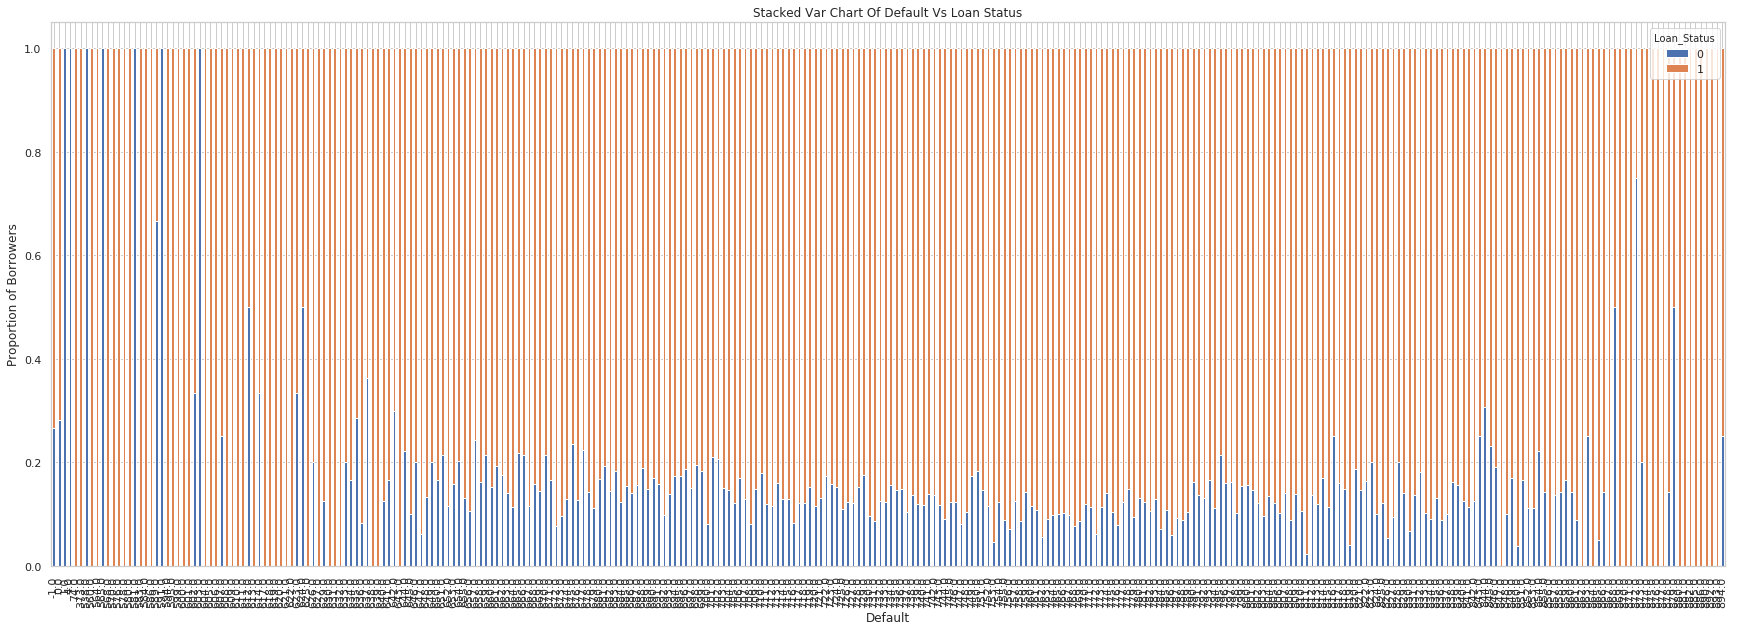

In [40]:
table=pd.crosstab(df.credit_score,df.Loan_Status)
table.div(table.sum(1).astype(int),axis=0).plot(kind='bar',figsize=(30,10),
                                                stacked=True)
plt.title('Stacked Var Chart Of Default Vs Loan Status')
plt.xlabel('Default')
plt.ylabel('Proportion of Borrowers')
plt.savefig('Default_vs_repay_stack')

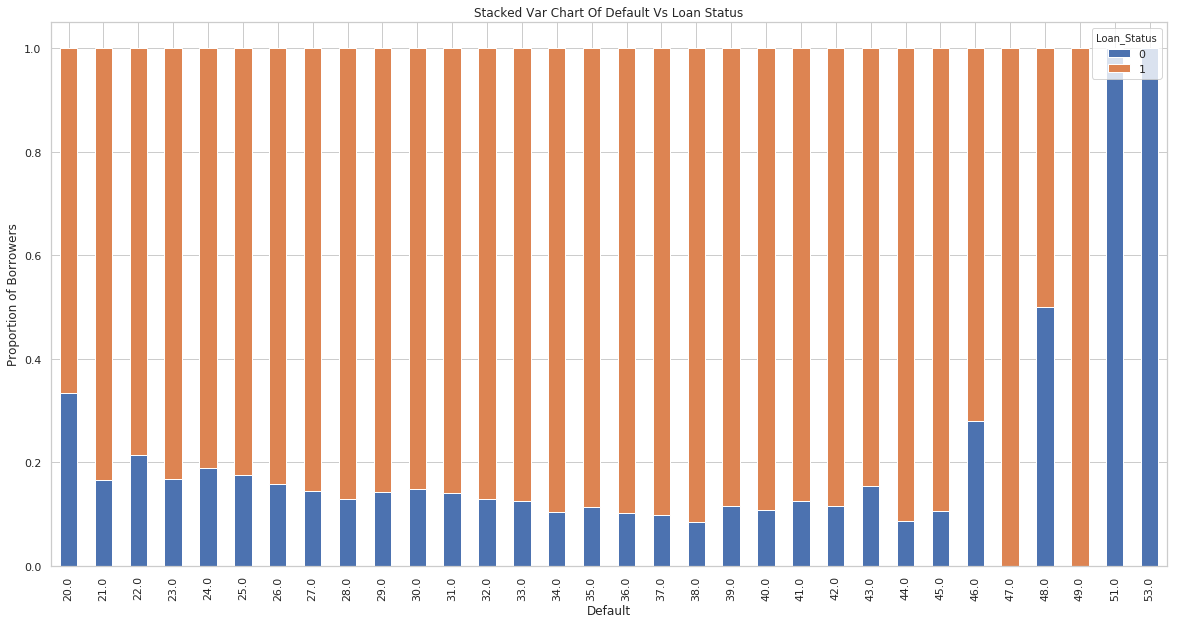

In [41]:
table=pd.crosstab(loan_status.AGE,loan_status.Loan_Status)
table.div(table.sum(1).astype(int),axis=0).plot(kind='bar',figsize=(20,10),
                                                stacked=True)
plt.title('Stacked Var Chart Of Default Vs Loan Status')
plt.xlabel('Default')
plt.ylabel('Proportion of Borrowers')
plt.savefig('Default_vs_repay_stack')

##### Age also can be the good criteria for prediction

In [42]:
#Renaming a column
x=loan_status.rename(columns={'Avg SALARY':'Avg_salary'})
x.head()

,purpose,tenure,credit_score,default_count,Avg_salary,city,stay_type,AGE,gender,Loan_Status
0,DEBT CONSOLIDATION,2,803.0,0.0,32546.0,Mumbai,SELF OWNED,26.0,MALE,1
1,ADVANCE SALARY,2,804.0,0.0,24975.0,Bangalore,RENTED,28.0,MALE,1
2,HOME APPLICANCE PURCHASE,3,660.0,0.0,25000.0,Bangalore,RENTED,23.0,MALE,1
3,ADVANCE SALARY,3,751.0,0.0,20515.0,Bangalore Rural,RENTED,32.0,MALE,1
4,EDUCATION,3,660.0,0.0,24400.0,Thane,RENTED,34.0,MALE,0


In [43]:
y = x[['Avg_salary', 'Loan_Status']]
y.tail()

,Avg_salary,Loan_Status
22582,51327.5,1
22583,37651.0,1
22584,13965.5,1
22585,18038.5,1
22586,67481.5,1


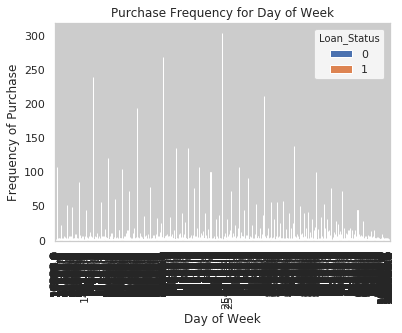

In [44]:
pd.crosstab(y.Avg_salary,y.Loan_Status).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

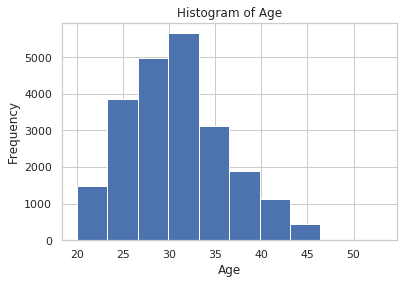

In [45]:
loan_status.AGE.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

#### Most of the customers of the bank in this dataset are in the age range of 30–40.

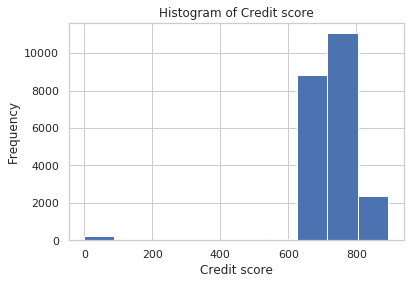

In [46]:
x.credit_score.hist()
plt.title('Histogram of Credit score')
plt.xlabel('Credit score')
plt.ylabel('Frequency')
plt.savefig('hist_age')

#### Most of the customers of the bank in this dataset are in the credit score range of 700-800

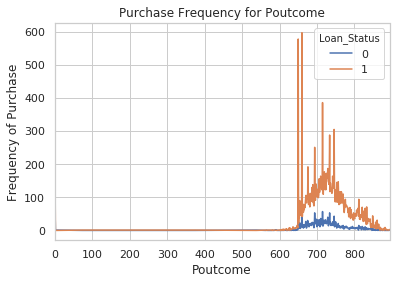

In [47]:
pd.crosstab(loan_status.credit_score,loan_status.Loan_Status).plot(kind='line')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

In [51]:
import seaborn as sns

ValueError: array must not contain infs or NaNs

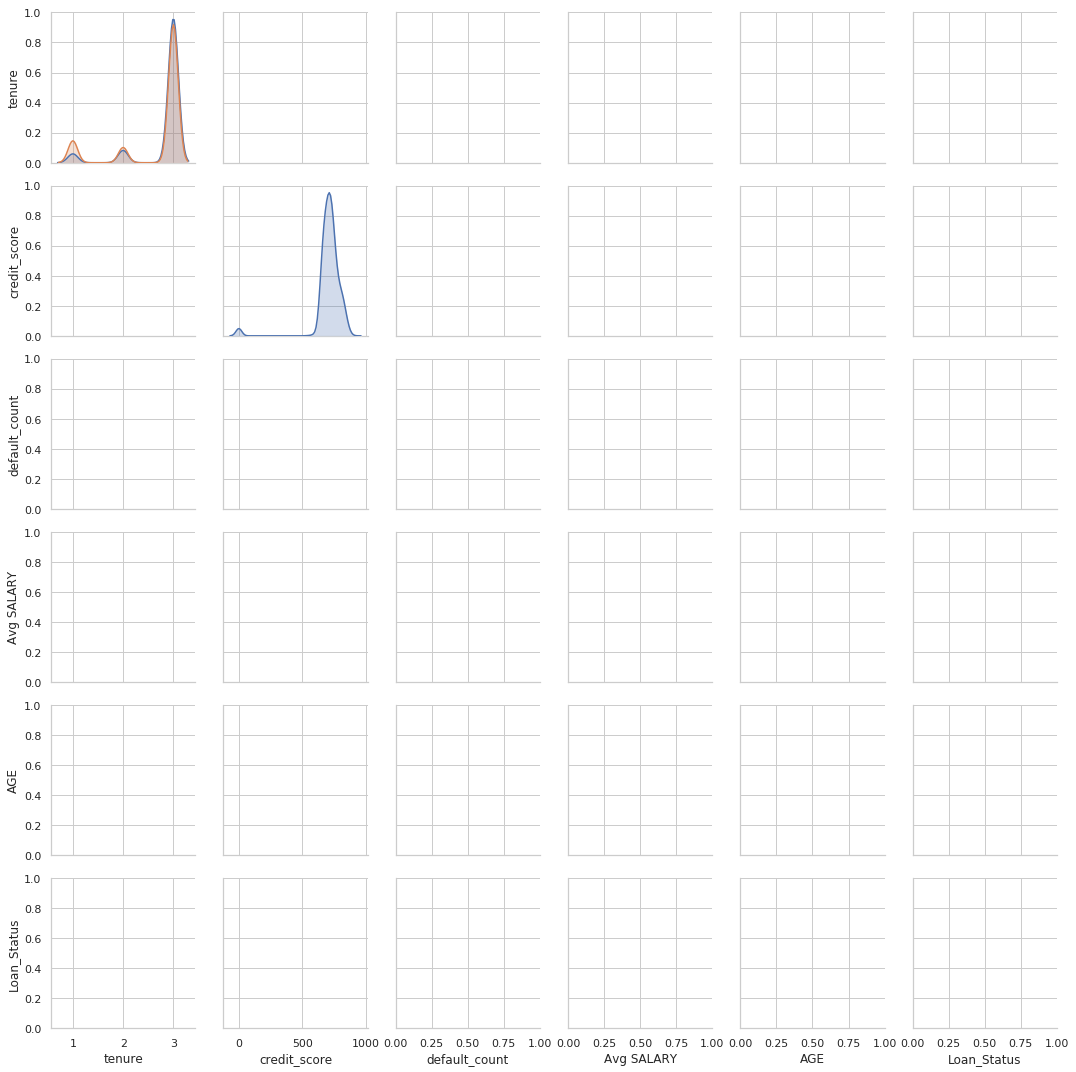

In [54]:
sns.pairplot(loan_status,hue="Loan_Status", )

In [55]:
loan_status.columns


Index([u'purpose', u'tenure', u'credit_score', u'default_count', u'Avg SALARY',
       u'city', u'stay_type', u'AGE', u'gender', u'Loan_Status'],
      dtype='object')

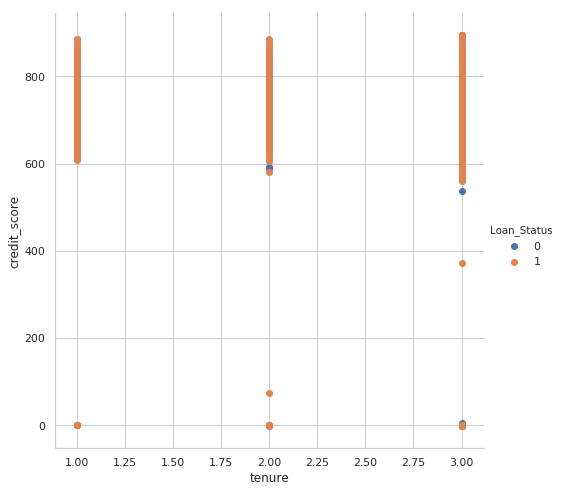

In [59]:
sns.FacetGrid(loan_status,hue='Loan_Status',height=7).map(plt.scatter,"tenure",'credit_score').add_legend()

In [65]:
loan_status["Loan_Status"].value_counts()

1    19468
0     3119
Name: Loan_Status, dtype: int64

In [66]:
loan_status.columns

Index([u'purpose', u'tenure', u'credit_score', u'default_count', u'Avg SALARY',
       u'city', u'stay_type', u'AGE', u'gender', u'Loan_Status'],
      dtype='object')

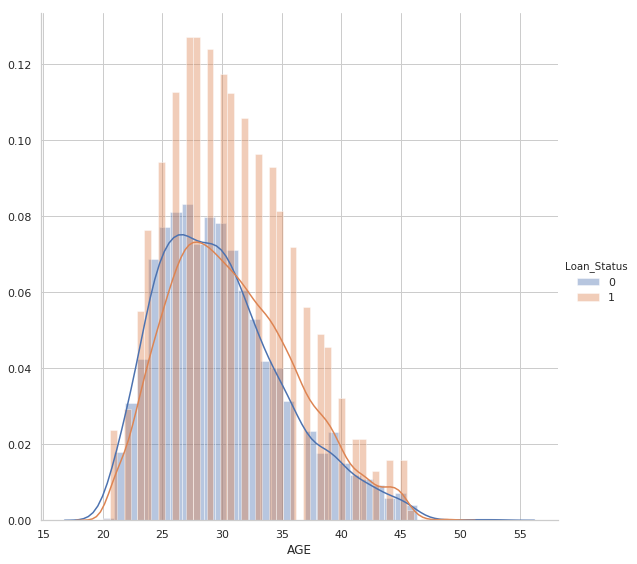

In [70]:
sns.FacetGrid(loan_status,hue='Loan_Status',height=8).map(sns.distplot,'AGE').add_legend()

In [72]:
g=loan_status.groupby("Loan_Status")

In [73]:
zero=g.get_group(0)

In [75]:
one=g.get_group(1)

In [76]:
zero['AGE'].std()

5.357309578470461

In [77]:
one['AGE'].std()

5.374826456487871

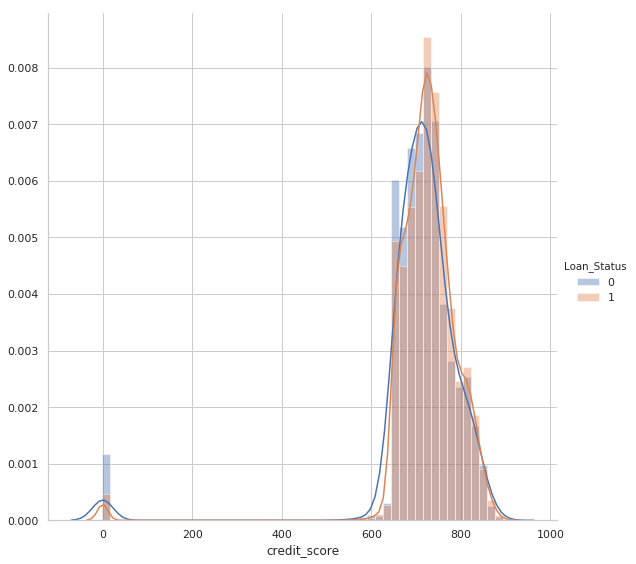

In [78]:
sns.FacetGrid(loan_status,hue='Loan_Status',height=8).map(sns.distplot,'credit_score').add_legend()

### Credit Score doesn't Look like much useful

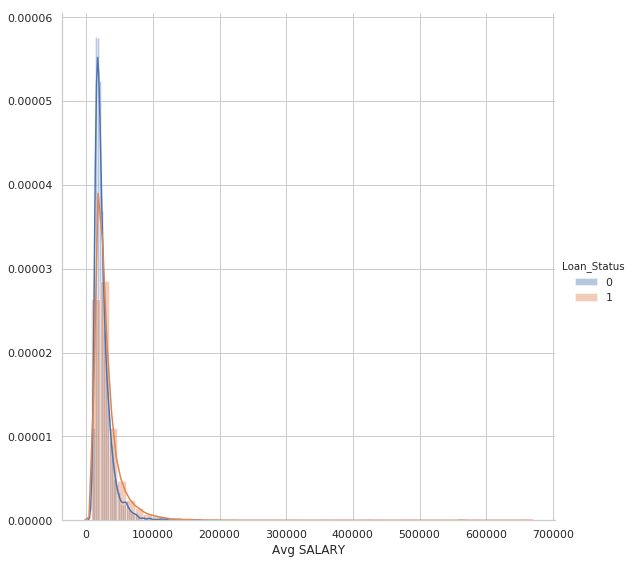

In [83]:
sns.FacetGrid(loan_status,hue='Loan_Status',height=8).map(sns.distplot,'Avg SALARY').add_legend()

In [95]:
df2=loan_status[['tenure','credit_score','default_count','Avg SALARY','AGE','Loan_Status']]
df2

,tenure,credit_score,default_count,Avg SALARY,AGE,Loan_Status
0,2,803.0,0.0,32546.0,26.0,1
1,2,804.0,0.0,24975.0,28.0,1
2,3,660.0,0.0,25000.0,23.0,1
3,3,751.0,0.0,20515.0,32.0,1
4,3,660.0,0.0,24400.0,34.0,0
5,3,655.0,0.0,28000.0,21.0,1
6,3,795.0,0.0,19500.0,34.0,1
7,3,691.0,0.0,35000.0,34.0,1
8,2,0.0,0.0,20000.0,26.0,1
9,3,871.0,0.0,20000.0,39.0,1


In [100]:
df2.to_csv("num.csv",index=Falre)

In [102]:
x=pd.read_csv("num.csv")

ValueError: max must be larger than min in range parameter.

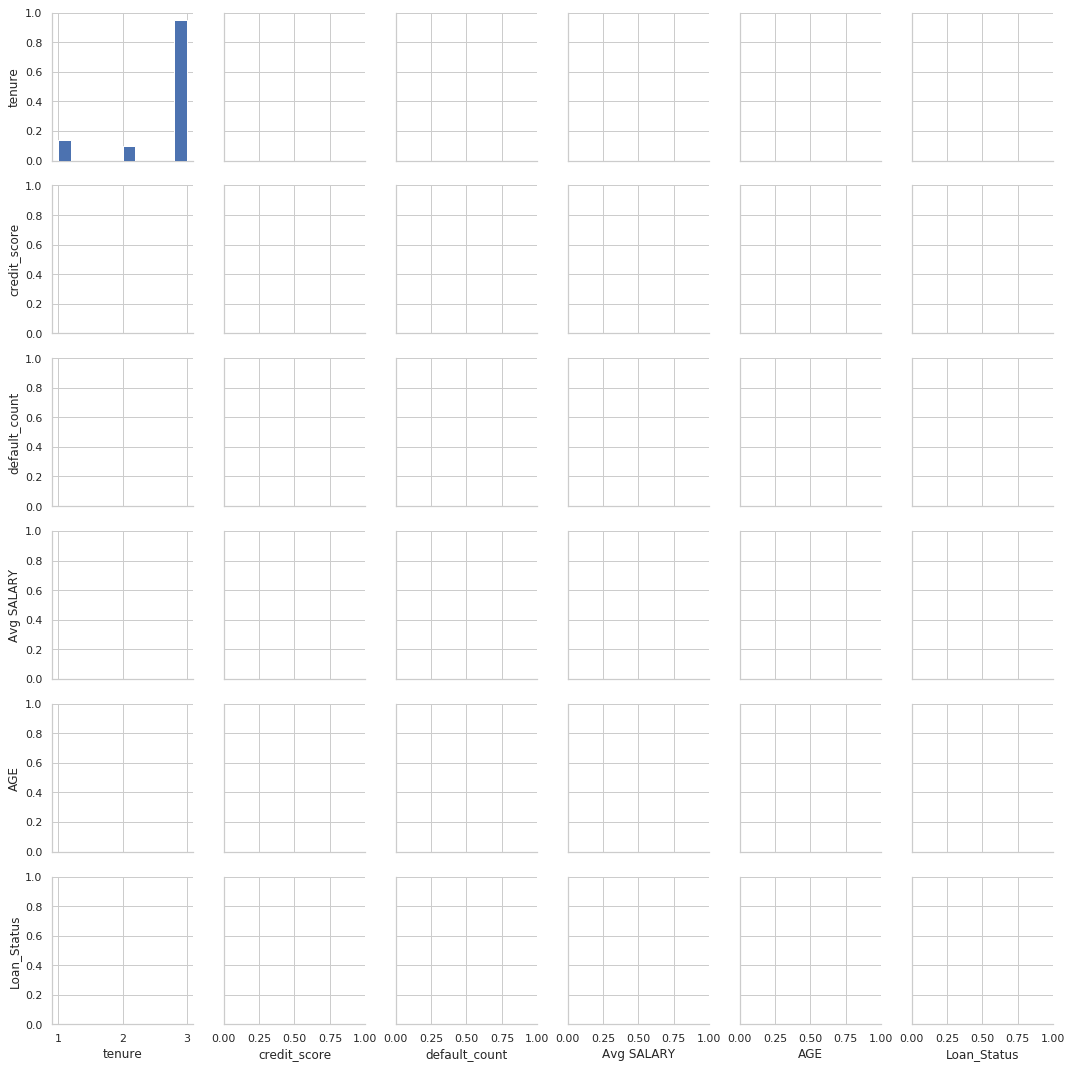

In [105]:
sns.pairplot(x)